In [5]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('data/data_single_loc.csv')
df

,t2m,d2m,msl,tp,ssrd,Date Time,windspeed_10,windspeed_100
0,262.714033,259.900872,103298.015394,0.000000,0.0,1950-01-01 00:00:00,2.489513,3.817744
1,260.695745,258.184905,103401.866726,0.000000,0.0,1950-01-01 01:00:00,1.837656,3.726080
2,260.195929,257.699157,103434.928307,0.000000,0.0,1950-01-01 02:00:00,2.599009,3.537574
3,259.350219,256.948053,103418.318422,0.000000,0.0,1950-01-01 03:00:00,2.534284,3.147813
4,258.763065,256.665744,103419.030274,0.000000,0.0,1950-01-01 04:00:00,2.623488,3.713367
...,...,...,...,...,...,...,...,...
622387,274.643734,274.172750,100974.912154,0.000006,0.0,2020-12-31 19:00:00,0.809895,1.810642
622388,274.719036,274.144356,100973.148236,0.000005,0.0,2020-12-31 20:00:00,0.868971,1.490224
622389,274.310849,273.971416,100980.668096,0.000003,0.0,2020-12-31 21:00:00,0.774225,1.328229
622390,273.450250,273.092257,100972.962561,0.000002,0.0,2020-12-31 22:00:00,0.649268,0.561700


In [20]:
df['Date Time'] = pd.to_datetime(df['Date Time'])
df['yyyy'] = pd.to_datetime(df['Date Time']).dt.year
df['mm'] = pd.to_datetime(df['Date Time']).dt.month
df['dd'] = pd.to_datetime(df['Date Time']).dt.day
df['DOY'] = pd.to_datetime(df['Date Time']).dt.dayofyear
df['hour'] = pd.to_datetime(df['Date Time']).dt.hour

In [22]:
fract_year = 2*np.pi/365*(df['DOY']-1+(df['hour']-12)/24)

In [23]:
EoT = 229.18*(0.000075+0.001868*np.cos(fract_year)-0.032077*np.sin(fract_year)-0.014615*np.cos(2*fract_year)-0.040849*np.sin(2*fract_year))

In [24]:
offset = EoT + 4*(50-15*1)

In [25]:
LST = df['hour'] + offset

In [26]:
h = 15*(LST - 12)

In [27]:
solar_decl = -23.44*np.cos(360/365*(df['DOY']-10))

In [45]:
zenith_angle_cos = np.sin(50*np.pi/180)*np.sin(solar_decl)+np.cos(50*np.pi/180)*np.cos(solar_decl)*np.cos(h)

In [34]:
def solar_flux_teor(zenith_angle_cos):
    if zenith_angle_cos>0:
        return 1.3608*1*zenith_angle_cos
    else:
        return 0

df['toa_irradiation'] = zenith_angle_cos
df['toa_irradiation'] = df['toa_irradiation'].apply(solar_flux_teor)

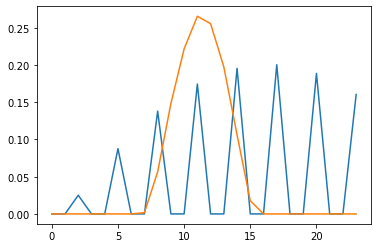

In [37]:
plt.plot(df['toa_irradiation'][:24])
plt.plot(df['ssrd'][:24])

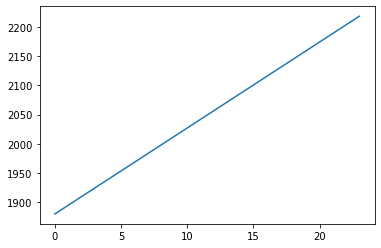

In [47]:
plt.plot(h[:24])

In [9]:
tz = 'CET'
lat, lon = 20, 50

site = location.Location(lat, lon, tz=tz)

In [10]:
times = pd.date_range('06-01-2000', freq='10min', periods=6*24,
                          tz=site.tz)

In [15]:
type(times)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
clearsky = site.get_clearsky(times)

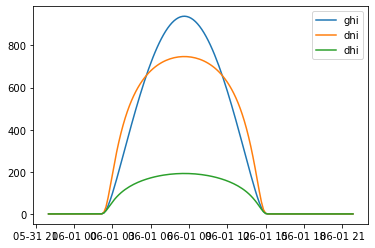

In [12]:
plt.plot(clearsky['ghi'])
plt.plot(clearsky['dni'])
plt.plot(clearsky['dhi'])
plt.legend(labels = ['ghi','dni','dhi'])

In [14]:
times

DatetimeIndex(['2000-06-01 00:00:00+02:00', '2000-06-01 00:10:00+02:00',
               '2000-06-01 00:20:00+02:00', '2000-06-01 00:30:00+02:00',
               '2000-06-01 00:40:00+02:00', '2000-06-01 00:50:00+02:00',
               '2000-06-01 01:00:00+02:00', '2000-06-01 01:10:00+02:00',
               '2000-06-01 01:20:00+02:00', '2000-06-01 01:30:00+02:00',
               ...
               '2000-06-01 22:20:00+02:00', '2000-06-01 22:30:00+02:00',
               '2000-06-01 22:40:00+02:00', '2000-06-01 22:50:00+02:00',
               '2000-06-01 23:00:00+02:00', '2000-06-01 23:10:00+02:00',
               '2000-06-01 23:20:00+02:00', '2000-06-01 23:30:00+02:00',
               '2000-06-01 23:40:00+02:00', '2000-06-01 23:50:00+02:00'],
              dtype='datetime64[ns, CET]', length=144, freq='10T')